<a href="https://colab.research.google.com/github/ivaqurrota/Logistic_Regression/blob/main/Data%20Mining%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing

In [ ]:
data = pd.read_csv("dress.csv",delimiter=';')
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,Vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,Cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffon,chiffon,bow,dot,0


In [ ]:
data.shape

(500, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   Waistline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  PatternType     391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [ ]:
np.sum(data.isnull())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Waistline          87
Material          128
FabricType        266
Decoration        236
PatternType       109
Recommendation      0
dtype: int64

In [ ]:
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,PatternType,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,Vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,Cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffon,chiffon,bow,dot,0


dikarenakan missing value dari variabel Price, Season, Neckline dan Sleevelength kurang dari 5% maka dapat dilakukan penghapusan baris. Variabel Waistline, Pattern Type, Material dan Decoration missing value kurang dari 50%, maka missing value dapat diimputasikan. Missing value variabel Fabric Type sebesar 53,2%, maka variabel dapat dihapus. Juga dihpus variabel Dress_ID karena dirasa tidak perlu.

In [ ]:
#Imputasi data
from scipy.stats import mode

data['Waistline']=data['Waistline'].fillna(data['Waistline'].mode()[0])
data['PatternType']=data['PatternType'].fillna(data['PatternType'].mode()[0])
data['Material']=data['Material'].fillna(data['Material'].mode()[0])
data['Decoration']=data['Decoration'].fillna(data['Decoration'].mode()[0])
np.sum(data.isnull())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Waistline           0
Material            0
FabricType        266
Decoration          0
PatternType         0
Recommendation      0
dtype: int64

In [ ]:
#menghapus variabel Fabric Type dan Dress_ID

data=data.drop('FabricType',1)
data=data.drop('Dress_ID',1)
np.sum(data.isnull())

Style             0
Price             2
Rating            0
Size              0
Season            2
NeckLine          3
SleeveLength      2
Waistline         0
Material          0
Decoration        0
PatternType       0
Recommendation    0
dtype: int64

In [ ]:
#menghapus baris yang mengandung missing value

data=data.dropna()
np.sum(data.isnull())

Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Waistline         0
Material          0
Decoration        0
PatternType       0
Recommendation    0
dtype: int64

In [ ]:
data.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,PatternType,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,cotton,ruffles,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,petal,natural,microfiber,ruffles,animal,0
2,Vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,lace,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,embroidary,print,1
4,Cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffon,bow,dot,0


In [ ]:
#Mengubah variabel rating menjadi numeric
data.Rating = data.Rating.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Style           493 non-null    object
 1   Price           493 non-null    object
 2   Rating          493 non-null    int32 
 3   Size            493 non-null    object
 4   Season          493 non-null    object
 5   NeckLine        493 non-null    object
 6   SleeveLength    493 non-null    object
 7   Waistline       493 non-null    object
 8   Material        493 non-null    object
 9   Decoration      493 non-null    object
 10  PatternType     493 non-null    object
 11  Recommendation  493 non-null    int64 
dtypes: int32(1), int64(1), object(10)
memory usage: 48.1+ KB


In [ ]:
data.shape

(493, 12)

# Summary Statistics and Visualization

<AxesSubplot:xlabel='Price', ylabel='Rating'>

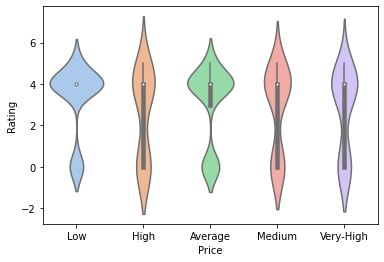

In [ ]:
#Plot Rating
sns.violinplot(x=data["Price"], y=data["Rating"], palette="pastel")

<AxesSubplot:>

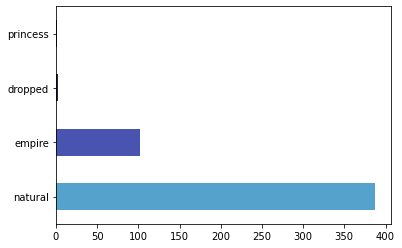

In [ ]:
#Plot Waistline
color =sns.color_palette("icefire")
data['Waistline'].value_counts().plot.barh(color=color)

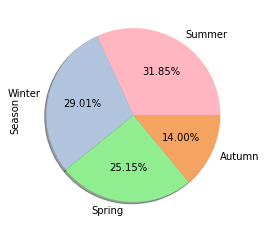

In [ ]:
#Plot Season
Pie = data['Season'].value_counts()
color = ["lightpink", "lightsteelblue", "lightgreen", "sandybrown"]
Pie.plot.pie(autopct='%.2f%%',colors=color, shadow= True)
plt.show()

<AxesSubplot:>

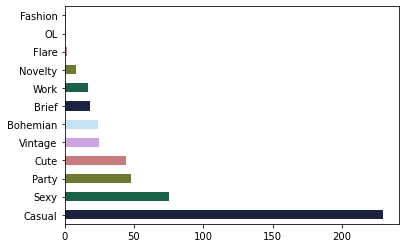

In [ ]:
#Plot Style
color = sns.color_palette('cubehelix')
data['Style'].value_counts().plot.barh(color=color)

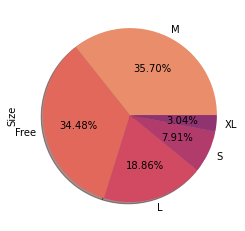

In [ ]:
#Plot Size
Pie = data['Size'].value_counts()
color = sns.color_palette('flare')
Pie.plot.pie(autopct='%.2f%%', colors=color, shadow= True)
plt.show()

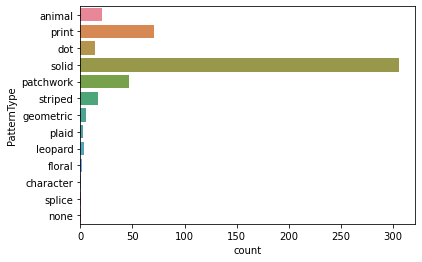

In [ ]:
#Plot Pattern Type
sns.countplot(y="PatternType", data=data,alpha=0.95,palette='husl')
plt.show()

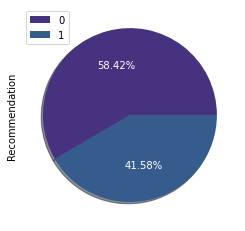

In [ ]:
#Plot Recommendation
Pie = data['Recommendation'].value_counts()
color = sns.color_palette('viridis')
Pie.plot.pie(autopct='%.2f%%',textprops={'color':"w"},colors=color, shadow= True)
plt.legend(loc="upper left")
plt.show()

In [ ]:
data['Rating'].describe()

count    493.000000
mean       3.137931
std        1.798046
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

# Feature Selection/Extraction

In [ ]:
data.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,PatternType,Recommendation
0,Sexy,Low,4,M,Summer,o-neck,sleeveless,empire,cotton,ruffles,animal,1
1,Casual,Low,0,L,Summer,o-neck,petal,natural,microfiber,ruffles,animal,0
2,Vintage,High,0,L,Autumn,o-neck,full,natural,polyster,lace,print,0
3,Brief,Average,4,L,Spring,o-neck,full,natural,silk,embroidary,print,1
4,Cute,Low,4,M,Summer,o-neck,butterfly,natural,chiffon,bow,dot,0


In [ ]:
data['Style']= data['Style'].map({'Bohemian':0, 'Brief':1, 'Casual':2, 'Cute':3, 'Fashion':4, 'Flare':5,
                                  'Novelty':6, 'OL':7, 'Sexy':8, 'Vintage':9, 'Work':10, 'Party':11})
data['Price']= data['Price'].map({'Low':0, 'Average':1, 'Medium':2, 'High':3, 'Very-High':4})
data['Size']= data['Size'].map({'S':0, 'M':1, 'L':2, 'XL':3, 'Free':4})
data['Season']= data['Season'].map({'Autumn':0, 'Spring':1, 'Summer':2, 'Winter':3})
data['NeckLine']= data['NeckLine'].map({'o-neck':0, 'v-neck':1, 'boat-neck':2, 'peterpan-collor':3, 'ruffled':4,
                                        'turndowncollor':5, 'slash-neck':6, 'mandarin-collor':7,'open':8,
                                        'square-collor':9, 'sweetheart':10, 'Scoop':11, 'halter':12, 'backless':13,
                                        'bowneck':14})
data['SleeveLength']= data['SleeveLength'].map({'sleeveless':0, 'halfsleeves':1, 'capsleeves':2, 'short':3, 'full':4,
                                                'petal':5, 'threequarter':6, 'turndowncollor':7, 'butterfly':8})
data['Waistline']= data['Waistline'].map({'empire':0, 'dropped':1, 'natural':2, 'princess':3})
data['Material']= data['Material'].map({'cotton':0, 'microfiber':1, 'polyster':2, 'silk':3, 'chiffon':4, 'nylon':5,
                                        'milksilk':6, 'linen':7, 'rayon':8, 'lycra':9, 'acrylic':10, 'spandex':11,
                                        'lace':12,'model':13, 'cashmere':14, 'viscos':15, 'knitting':16, 'wool':17,
                                        'mix':18, 'other':19})
data['Decoration']= data['Decoration'].map({'ruffles':0, 'lace':1, 'embroidary':2, 'bow':3, 'beading':4, 'sashes':5,
                                            'hollowout':6, 'pockets':7, 'sequined':8, 'applique':9, 'button':10,'Tiered':11, 
                                            'rivet':12,'feathers':13, 'flowers':14, 'pearls':15, 'crystal':16,'ruched':17,
                                            'draped':18, 'tassel':19, 'plain':20, 'cascading':21, 'none':22})
data['PatternType']= data['PatternType'].map({'none':0, 'animal':1, 'print':2, 'dot':3, 'solid':4, 'patchwork':5,
                                              'striped':6,'geometric':7, 'plaid':8, 'leopard':9, 'floral':10,
                                              'character':11, 'splice':12})

In [ ]:
data

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,PatternType,Recommendation
0,8,0,4,1,2,0,0,0,0,0,1,1
1,2,0,0,2,2,0,5,2,1,0,1,0
2,9,3,0,2,0,0,4,2,2,1,2,0
3,1,1,4,2,1,0,4,2,3,2,2,1
4,3,0,4,1,2,0,8,2,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,0,4,1,1,0,4,2,2,1,4,1
496,8,0,4,4,2,0,4,0,0,1,4,0
497,2,1,4,1,2,1,4,0,0,1,4,1
498,2,1,4,2,3,2,0,0,3,9,2,1


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = data
y = data['Recommendation']
#feature selection using chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2'] 
#print 5 best features
print(featureScores.nlargest(5,'Score_chi2'))

   Selected_columns  Score_chi2
11   Recommendation  288.000000
8          Material   13.505488
1             Price    8.090818
0             Style    5.729792
6      SleeveLength    1.631758


# Classification

In [ ]:
from sklearn.preprocessing import LabelEncoder # Buat nge-coding
from sklearn.model_selection import train_test_split # Buat testing training
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

In [ ]:
LE = LabelEncoder()
data.Recommendation = LE.fit_transform(data.Recommendation )
data.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,PatternType,Recommendation
0,8,0,4,1,2,0,0,0,0,0,1,1
1,2,0,0,2,2,0,5,2,1,0,1,0
2,9,3,0,2,0,0,4,2,2,1,2,0
3,1,1,4,2,1,0,4,2,3,2,2,1
4,3,0,4,1,2,0,8,2,4,3,3,0


In [ ]:
x = data.drop("Recommendation", axis = 1)
y = data.Recommendation

## Metode SVM

### Repeat hold out

In [ ]:
clf = svm.SVC(kernel = 'linear')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)  
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)

df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

0.5967741935483871
0.13725490196078433
0.9178082191780822


,Akurasi,Spesitifitas,Sensitivitas
0,0.596774,0.137255,0.917808
1,0.596774,0.137255,0.917808
2,0.596774,0.137255,0.917808
3,0.596774,0.137255,0.917808
4,0.596774,0.137255,0.917808


#### ROC-AUC

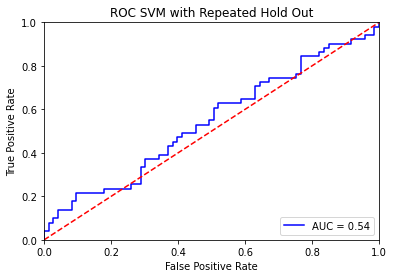

In [ ]:
import sklearn.metrics as metrics
clf = svm.SVC(kernel = 'linear', probability = True)
clf = clf.fit(x_train, y_train)
probs = clf.predict_proba(x_test)#probabilitas klasifikasi
preds = probs[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(y_test, preds)
roc_auc3 = metrics.auc(fpr3, tpr3)

import matplotlib.pyplot as plt
plt.title('ROC SVM with Repeated Hold Out')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-fold CV
dengan k=5

In [ ]:
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 5)
kfold.get_n_splits(x)

5

In [ ]:
arr_x = np.array(x)
arr_y = np.array(y)

In [ ]:
for train_index, test_index in kfold.split(arr_x):
    print('Train : ', train_index, 'Test : ', test_index)

Train :  [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 3

In [ ]:
x_train1, x_test1 = arr_x[train_index], arr_x[test_index]
y_train1, y_test1 = arr_y[train_index], arr_y[test_index]

In [ ]:
model_kfold1 = svm.SVC(kernel = 'linear')

results_kfold1 = model_selection.cross_val_score(model_kfold1, x, y, cv = kfold)
results_kfold1

array([0.57575758, 0.60606061, 0.45454545, 0.68367347, 0.56122449])

In [ ]:
y_pred1 = cross_val_predict(model_kfold1, x_train1, y_train1, cv = kfold)
cm1 = confusion_matrix(y_train1, y_pred1)
print(cm1)

[[218  12]
 [155  10]]


In [ ]:
se=[]
sp=[]
akurasi = cross_val_score(model_kfold1, x_train1, y_train1, cv = kfold, scoring='accuracy')
akurasi = np.array(akurasi)
se.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
sp.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
akurasi=np.mean(akurasi)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)

0.5772151898734177
0.06060606060606061
0.9478260869565217


#### ROC-AUC

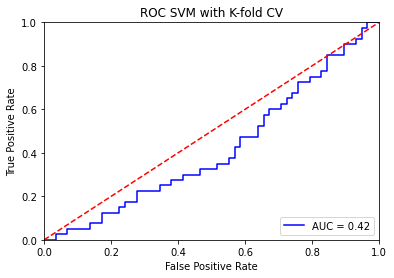

In [ ]:
import sklearn.metrics as metrics
clf = svm.SVC(kernel = 'linear', probability = True)
clf = clf.fit(x_train1, y_train1)
probs = clf.predict_proba(x_test1)#probabilitas klasifikasi
preds = probs[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test1, preds)
roc_auc2 = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('ROC SVM with K-fold CV')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Metode Naive Bayes

### Repeated Hold Out

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.25, random_state=1)
    y_pred2 = gnb.fit(x_train2, y_train2).predict(x_test2)
    cm.append((confusion_matrix(y_test2, y_pred2)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)

df_k2=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k2=pd.concat([df_k2,pd.DataFrame(test[i])],axis=1)
df_k2.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k2

0.4919354838709678
0.23529411764705882
0.6712328767123288


,Akurasi,Spesitifitas,Sensitivitas
0,0.491935,0.235294,0.671233
1,0.491935,0.235294,0.671233
2,0.491935,0.235294,0.671233
3,0.491935,0.235294,0.671233
4,0.491935,0.235294,0.671233


#### ROC-AUC

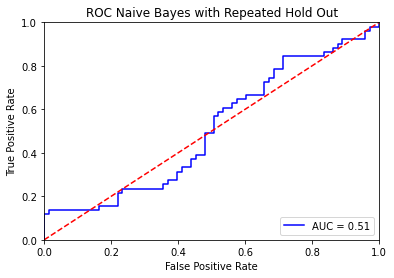

In [ ]:
import sklearn.metrics as metrics
probs = gnb.predict_proba(x_test2) #probabilitas klasifikasi
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC Naive Bayes with Repeated Hold Out')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-fold CV

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, RepeatedKFold
kfold = KFold(n_splits=5)

In [ ]:
arr_x1 = np.array(x)
arr_y1 = np.array(y)

for train_index1, test_index1 in kfold.split(arr_x1):
    print('Train : ', train_index1, 'Test : ', test_index1)

Train :  [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 3

In [ ]:
x_train3, x_test3 = arr_x[train_index1], arr_x[test_index1]
y_train3, y_test3 = arr_y[train_index1], arr_y[test_index1]

In [ ]:
model_kfold3 = GaussianNB()
result_kfold3 = model_selection.cross_val_score(model_kfold3, x, y, cv=kfold)
result_kfold3

array([0.55555556, 0.52525253, 0.47474747, 0.55102041, 0.53061224])

In [ ]:
y_pred3 = cross_val_predict(model_kfold3, x_train3, y_train3, cv = kfold)
cm2 = confusion_matrix(y_train3, y_pred3)
print(cm2)

[[175  55]
 [127  38]]


In [ ]:
se=[]
sp=[]
akurasi = cross_val_score(model_kfold3, x, y, cv = kfold, scoring='accuracy')
akurasi = np.array(akurasi)
se.append(cm2[0,0]/(cm2[0,0]+cm2[0,1]))
sp.append(cm2[1,1]/(cm2[1,0]+cm2[1,1]))
akurasi=np.mean(akurasi)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)

0.5274376417233559
0.23030303030303031
0.7608695652173914


#### ROC-AUC

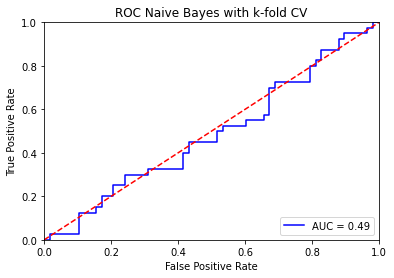

In [ ]:
import sklearn.metrics as metrics
probs = gnb.predict_proba(x_test3) #probabilitas klasifikasi
preds = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test3, preds)
roc_auc1 = metrics.auc(fpr1, tpr1)

import matplotlib.pyplot as plt
plt.title('ROC Naive Bayes with k-fold CV')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()